#Оконные функции
Что это такое. Какие бывают. Зачем нужны.

In [42]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft

###Построение спектра
С прошлого занятия

In [43]:
T = 4
Fd = 512 # Частота дискретизации
A0 = 0
F1 = 10
A1 = 1
Phi1 = 90
F2 = 11
A2 = 10
Phi2 = 0
Anoise = 0.3
N = 512//2 # Число отсчетов для построения спектра

t = np.linspace(0, T,  Fd*T)
x = A0 + A1*np.sin(F1*2.0*np.pi*t) + A2*np.sin(F2*2.0*np.pi*t+Phi2)


In [44]:
f = np.linspace(0, Fd//2, N//2)
XX = fft(x, N)
X = 2/N * np.abs(XX[0:N//2])
X[0] = X[0]/2

#Переходим к громкости в Децебелах
Xdb = 20*np.log10(X)

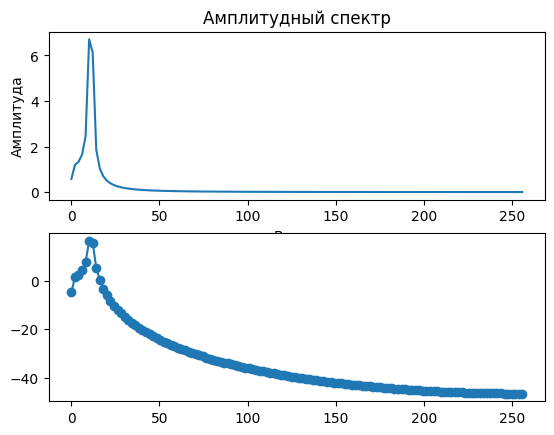

In [45]:
plt.subplot(2, 1, 1)
plt.plot(f, X)
plt.title('Амплитудный спектр');
plt.xlabel('Время');
plt.ylabel('Амплитуда');

plt.subplot(2, 1, 2);
plt.plot(f, Xdb, '-o');

##**Основные оконные функции**

/var/folders/_k/nn5n17p97159gl2pr01h6rf00000gn/T/ipykernel_1095/3484086623.py:8: DeprecationWarning: Importing triang from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.triang' or the convenience function 'scipy.signal.get_window' instead.
  ww[:,1] = sig.triang(N)
/var/folders/_k/nn5n17p97159gl2pr01h6rf00000gn/T/ipykernel_1095/3484086623.py:9: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  ww[:,2] = sig.hann(N)
/var/folders/_k/nn5n17p97159gl2pr01h6rf00000gn/T/ipykernel_1095/3484086623.py:10: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  ww[:,3] = sig.hamming(N)
/var/folders/_k/nn5n17p97159gl2pr

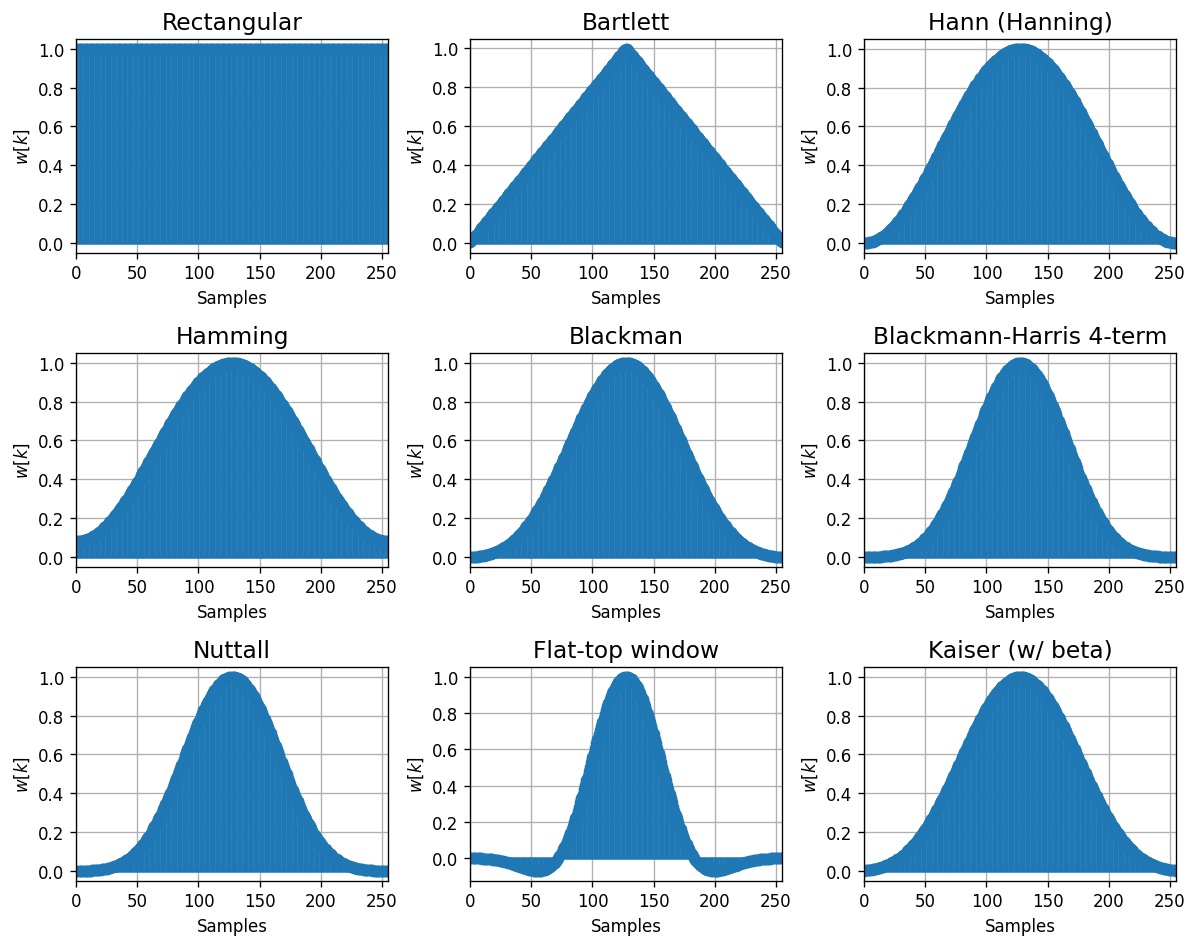

In [46]:
# Импорт библиотеки
import scipy.signal as sig

# Строим массив оконных функций. Число точек такое же как в вычислении спектра сигнала
ww = np.zeros((N, 9))

ww[:,0] = np.ones(N)
ww[:,1] = sig.triang(N)
ww[:,2] = sig.hann(N)
ww[:,3] = sig.hamming(N)
ww[:,4] = sig.blackman(N)
ww[:,5] = sig.blackmanharris(N)
ww[:,6] = sig.nuttall(N)
ww[:,7] = sig.flattop(N)
ww[:,8] = sig.kaiser(N, beta=8)

lst_titles = ['Rectangular', 'Bartlett', 'Hann (Hanning)',
              'Hamming', 'Blackman', 'Blackmann-Harris 4-term',
              'Nuttall', 'Flat-top window', 'Kaiser (w/ beta)'
             ]

# Plot window function and its spectrum
fig = plt.figure(figsize=(10, 8), dpi=120)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.stem(ww[:,i], basefmt='C0')
    plt.title(lst_titles[i], fontsize=14)
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
plt.tight_layout()

###**Спектры оконных функций**

/var/folders/_k/nn5n17p97159gl2pr01h6rf00000gn/T/ipykernel_1095/546306765.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.plot(tt, 20*np.log10(np.abs(fftshift(WW[:,i]))))


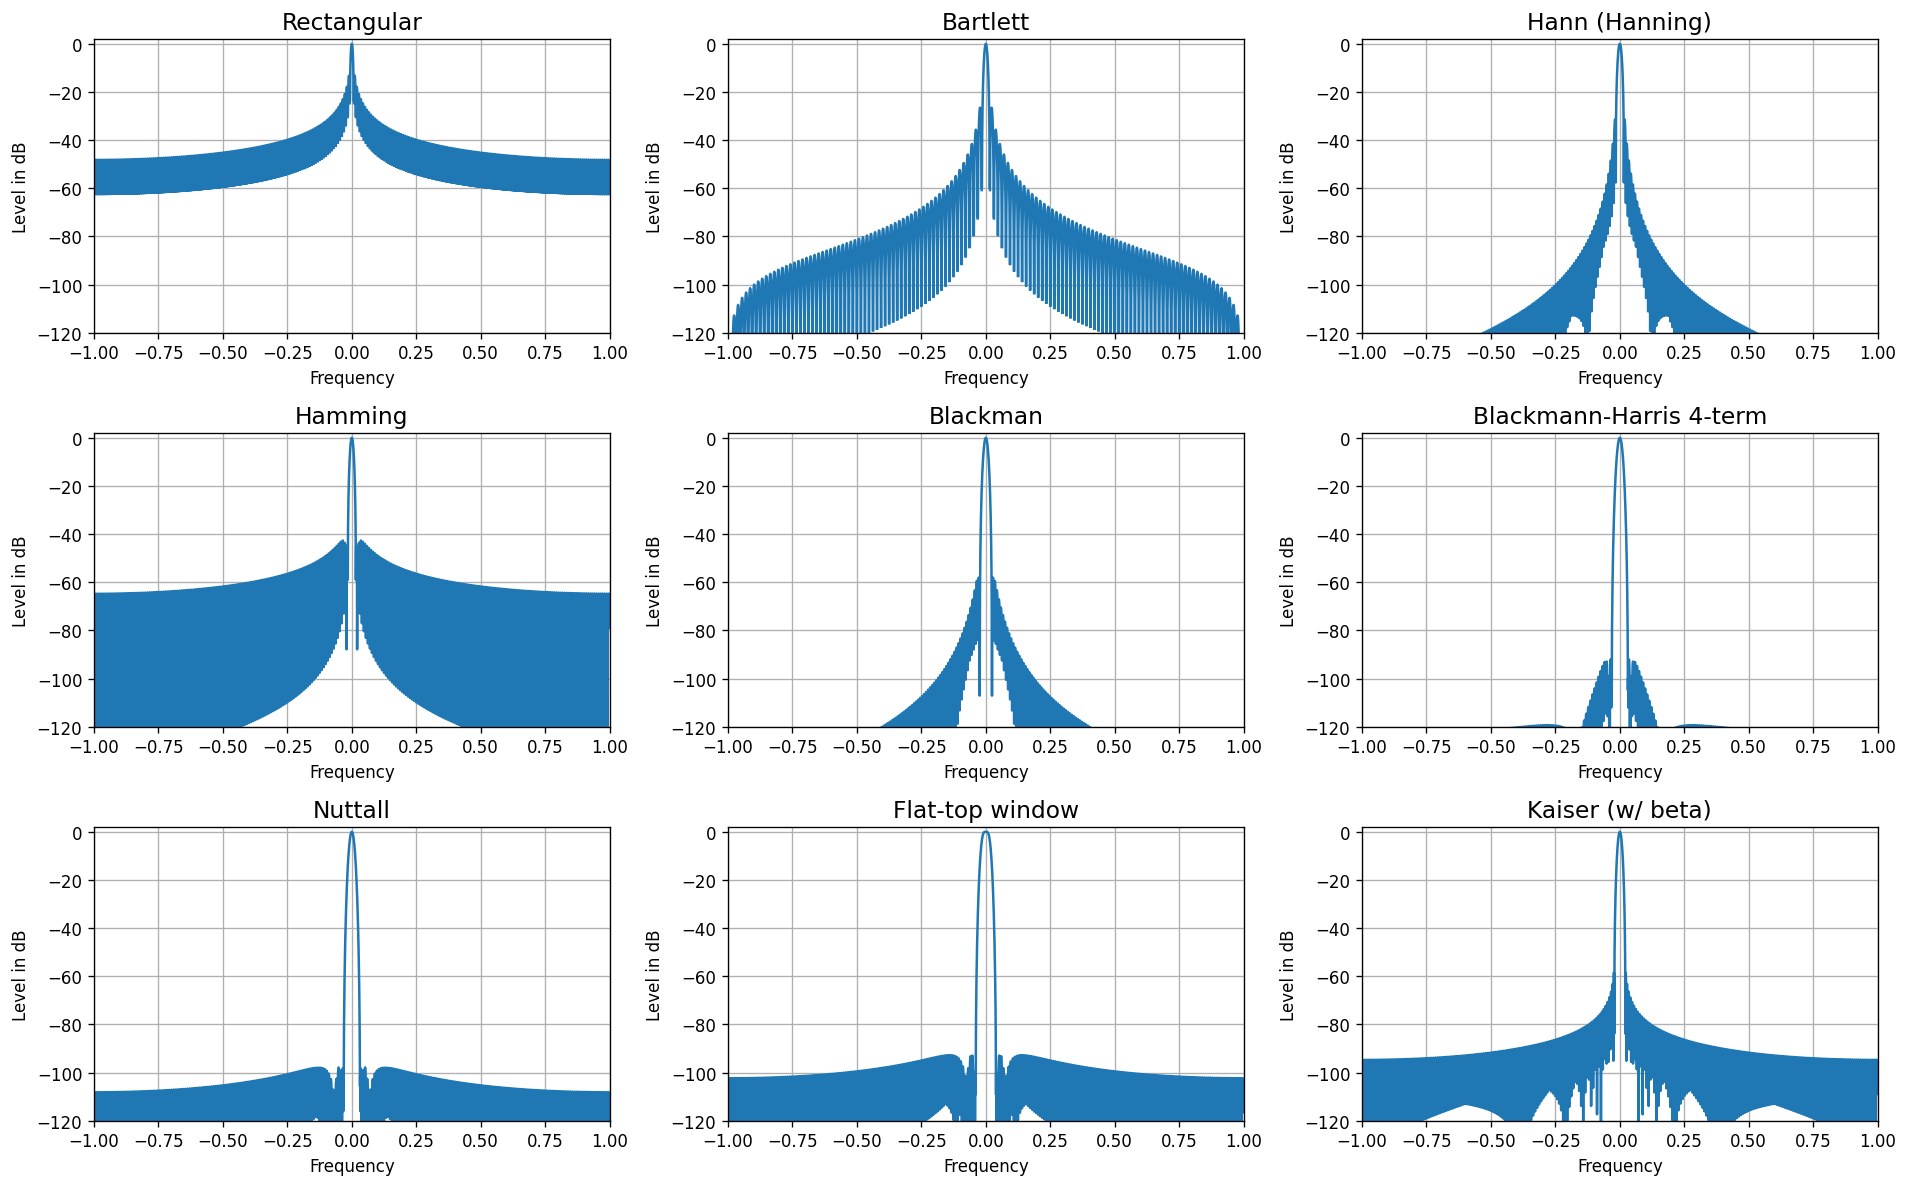

In [47]:
from scipy.fft import fftshift
# Число точек для спектров, для наглядности
NFFT = 2**12

# вычисляем спектры
WW = fft(ww, NFFT, axis=0)
WW = WW / np.amax(WW, axis=0)

tt = np.linspace(-1, 1, NFFT)

# Plot window function and its spectrum
fig2 = plt.figure(figsize=(16, 10), dpi=120)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(tt, 20*np.log10(np.abs(fftshift(WW[:,i]))))
    #plt.plot(tt, np.abs(fftshift(WW[:,i])), '-o')
    plt.title(lst_titles[i], fontsize=14)
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)

plt.tight_layout()

###Посмотрим на спектр прямоугольного окна поближе

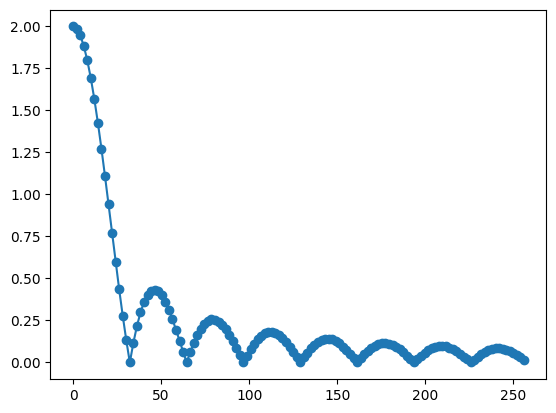

In [48]:
#Прямоугольное окно
RW = np.abs(fft(ww[:,0], N*16, axis=0))
RW = RW[0: N//2]*2/N
f = np.linspace(0, Fd//2, N//2)
plt.plot(f, RW, '-o');

#Как влияет использование сглаживащего окна

##**Размытие частоты**

In [184]:
T = 4
Fd = 512 # Частота дискретизации
A0 = 0
F1 = 225
A1 = 10
Phi1 = 0
F2 = 223 #219.6
A2 = 30
Phi2 = 0
Anoise = 0.3
N = 512//1 # Число отсчетов для построения спектра

t = np.linspace(0, T,  Fd*T)
x = A0 + A1*np.sin(F1*2.0*np.pi*t) + A2*np.sin(F2*2.0*np.pi*t+Phi2)
f = np.linspace(0, Fd//2, N//2)

In [185]:
f = np.linspace(0, Fd//2, N//2)
XX = fft(x, N)
X = 2/N * np.abs(XX[0:N//2])
X[0] = X[0]/2

X = 20*np.log10(X)

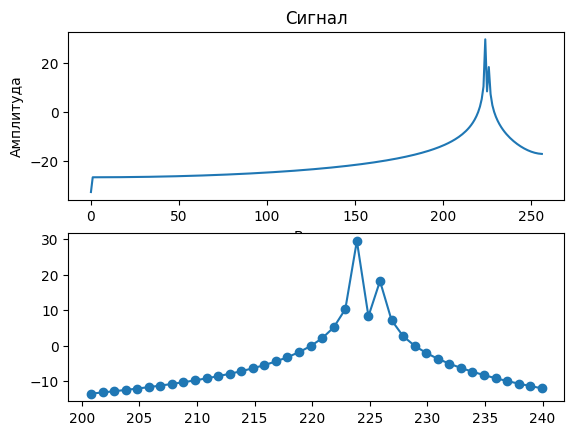

In [186]:
plt.subplot(2, 1, 1)
plt.plot(f, X)
plt.title('Сигнал');
plt.xlabel('Время');
plt.ylabel('Амплитуда');

plt.subplot(2, 1, 2);
#plt.plot(f, X, '-o');
plt.plot(f[200:240], X[200:240], '-o');

###Использование окна уменьшает размытие
**Задание:** Постройте спектр без использования окна, постройте спектр с применением оконной функции.

Постройте два графика амплитудных спектров в децибелах, сравните.

In [187]:
def cacl_spectr(x, N):
    x = x - x.mean()
    X = fft(x, N)
    X = 2/N * np.abs(X[0:N//2])
    X[0] = X[0]/2
    return X

In [188]:
x = x[0:N]
X1 = cacl_spectr(x * sig.blackman(N), N)
X1 = 20*np.log10(X1)
X2 = cacl_spectr(x, N)
X2 = 20*np.log10(X2)

/var/folders/_k/nn5n17p97159gl2pr01h6rf00000gn/T/ipykernel_1095/4055156817.py:2: DeprecationWarning: Importing blackman from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackman' or the convenience function 'scipy.signal.get_window' instead.
  X1 = cacl_spectr(x * sig.blackman(N), N)


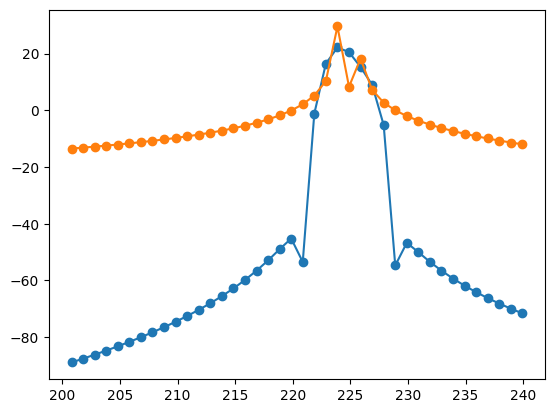

In [189]:
plt.plot(f[200:240], X1[200:240], '-o', f[200:240], X2[200:240], '-o')

#Примешивание частот
**Задание:** Постройте также два спектра (с окном и без), поиграйтесь с частотами и их амплитудами, чтобы смоделировать эффект "примешивания" частот.

Какой эффект наблюдаете от использования оконной функции?

In [190]:
t = np.linspace(0, T,  Fd*T)
x = A0 + A1*np.sin(F1*2.0*np.pi*t) + A2*np.sin(F2*2.0*np.pi*t+Phi2)
f = np.linspace(0, Fd//2, N//2)

In [191]:
x = x[0:N]
X1 = cacl_spectr(x * sig.blackman(N), N)
X1 = 20*np.log10(X1)
X2 = cacl_spectr(x, N)
X2 = 20*np.log10(X2)

/var/folders/_k/nn5n17p97159gl2pr01h6rf00000gn/T/ipykernel_1095/4055156817.py:2: DeprecationWarning: Importing blackman from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackman' or the convenience function 'scipy.signal.get_window' instead.
  X1 = cacl_spectr(x * sig.blackman(N), N)


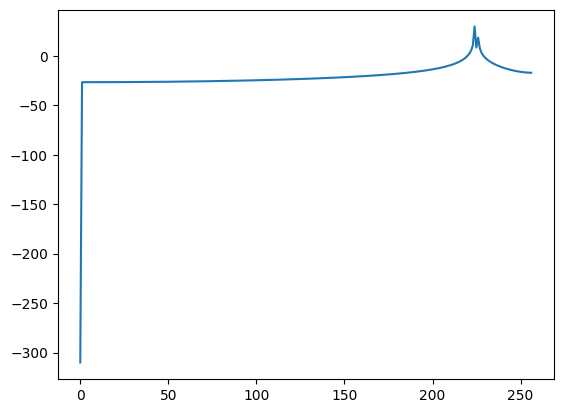

In [192]:
plt.plot(f, X2)

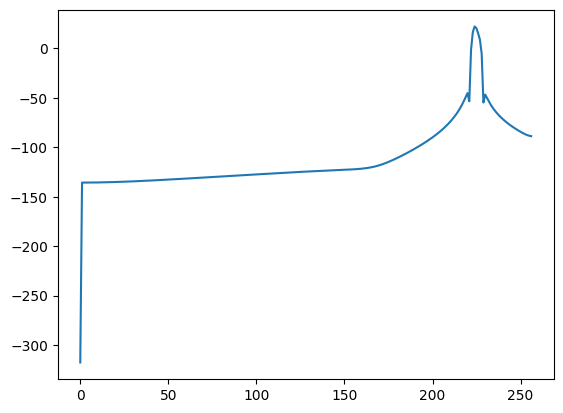

In [193]:
plt.plot(f, X1)

###Поиск слабых сигналов
Использование оконной функции позволяет "заметить" слабый сигнал на фоне существенно более сильного.
Рассмотрим пример когда одна частота имеет амплитуду 100, а другая -
существенно меньше (1 или 3).

In [194]:
import scipy.signal as sig

N = 128
NFFT = 2048

tt = np.linspace(0, 1, N, endpoint=True)
F1 = 100
A1 = 10
F2 = 103
A2 = 3
xx = A1*np.sin(F1*2.0*np.pi*tt) + A2*np.sin(F2*2.0*np.pi*tt)

/var/folders/_k/nn5n17p97159gl2pr01h6rf00000gn/T/ipykernel_1095/2199570883.py:2: DeprecationWarning: Importing kaiser from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.kaiser' or the convenience function 'scipy.signal.get_window' instead.
  wn = sig.kaiser(N, beta=7)


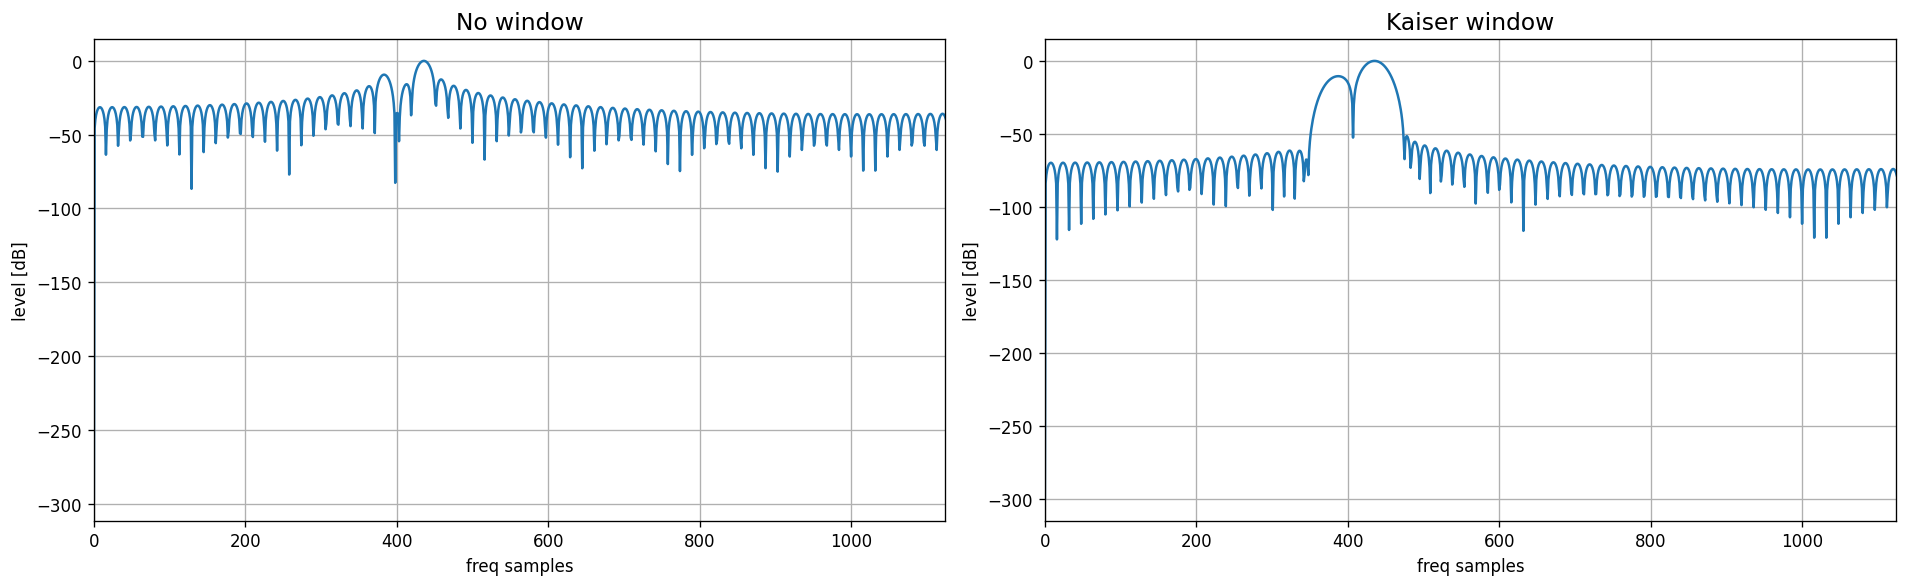

In [195]:
# Window (Kaiser)
wn = sig.kaiser(N, beta=7)
yy = xx*wn

sft = np.abs(fft(xx, NFFT))
slg = 20*np.log10(sft / np.max(sft))

yft = np.abs(fft(yy, NFFT))
ylg = 20*np.log10(yft / np.max(yft))

# Посмотреть амплитудные спектры
lst_ffts = [sft, yft]

# Посмотреть громкости
lst_ffts = [slg, ylg]

lst_wins = ['No window', 'Kaiser window']
plt.figure(figsize=(16, 5), dpi=120)
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(lst_wins[i], fontsize=14)
    plt.xlabel('freq samples')
    plt.ylabel('level [dB]')
    plt.plot(lst_ffts[i])
    plt.xlim([0, NFFT//2+100])
    #plt.ylim([-80, 0])
    plt.grid(True)
plt.tight_layout()

#**Задание**
1. Попробовать разные частоты и разные амплитуды.
2. Попробовать использовать различные оконные функции, сформулировать в чем их отличие.
3. Найти функции для загрузки/чтения/воспроизведения аудиофайлов (wav, mp3).

**В следующи раз** - обработка аудио файлов.